In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/meat-consumption-per-capita/GDP per capita PPP.csv
/kaggle/input/meat-consumption-per-capita/Consumption of meat per capita.csv


# Importing Dataset

In [2]:
meat_data = pd.read_csv('/kaggle/input/meat-consumption-per-capita/Consumption of meat per capita.csv')
gdp_data = pd.read_csv('/kaggle/input/meat-consumption-per-capita/GDP per capita PPP.csv')

meat_data,gdp_data

(            Entity  Year   Poultry       Beef  Sheep and goat  Pork  \
 0      Afghanistan  1961  0.641744   4.889479        8.332486   NaN   
 1      Afghanistan  1962  0.672726   5.106605        8.072717   NaN   
 2      Afghanistan  1963  0.673156   5.160862        8.251259   NaN   
 3      Afghanistan  1964  0.683714   5.132955        8.520909   NaN   
 4      Afghanistan  1965  0.714625   5.094256        8.820517   NaN   
 ...            ...   ...       ...        ...             ...   ...   
 10075     Zimbabwe  2017  5.090000  41.409996        1.810000  0.74   
 10076     Zimbabwe  2018  4.379997  40.989970        1.819999  0.52   
 10077     Zimbabwe  2019  4.470001  40.980010        1.770001  0.69   
 10078     Zimbabwe  2020  7.210003  40.120018        1.760001  0.64   
 10079     Zimbabwe  2021  7.329998  43.769985        1.909999  0.73   
 
        Other meats  Fish and seafood  
 0         0.865845          0.030559  
 1         0.896969          0.030578  
 2         1.0

In [3]:
print(meat_data.describe())
print(gdp_data.describe())

               Year       Poultry          Beef  Sheep and goat         Pork  \
count  10080.000000  10080.000000  10079.000000    10080.000000  9792.000000   
mean    1992.238492     12.545315     11.861681        3.455898    11.687291   
std       17.664153     13.795981     11.281156        6.570487    14.451765   
min     1961.000000      0.000000      0.000000        0.000000     0.000000   
25%     1977.000000      1.985262      4.250644        0.471978     1.063430   
50%     1993.000000      7.303228      8.111460        1.243124     5.348965   
75%     2008.000000     18.781992     16.737870        3.740079    17.406121   
max     2021.000000     89.530410     92.688950       66.910000    78.026120   

        Other meats  Fish and seafood  
count  10073.000000      10080.000000  
mean       1.864093         16.768571  
std        4.600452         17.234011  
min        0.000000          0.000000  
25%        0.099981          5.009638  
50%        0.677016         11.850100  

# Checking duplicate entries

In [4]:
print(sum(meat_data.duplicated()))
## No duplicates

0


# Handling Missing Values

In [5]:
print(meat_data.isnull().sum())


Entity                0
Year                  0
Poultry               0
Beef                  1
Sheep and goat        0
Pork                288
Other meats           7
Fish and seafood      0
dtype: int64



**It is notices that pork has a lot of missed entries,but Knowing that eating Pork is a forbidden practice in Islam, so checking if the hypothesis that null values of pork consumption are all in Islamic countries is neccesary.**


In [6]:
print(meat_data['Entity'][meat_data['Pork'].isnull()].unique())

['Afghanistan' 'Kuwait' 'Mauritania' 'Saudi Arabia' 'Sudan (former)'
 'Tunisia' 'United Arab Emirates']



**It is now clear that ALL countries having null values for Pork are Muslim-majority countries**
(Afghanistan, Kuwait, Mauritania, Saudi Arabia, Sudan (former), Tunisia, United Arab Emirates)

**Null pork values can be confidently replaced with 0. Also, the "Other" category may seem not reported at all in 7 entries, this also can be replaced with 0.**


In [7]:
meat_data['Pork'] = meat_data['Pork'].fillna(0)
meat_data['Other meats'] = meat_data['Other meats'].fillna(0)
print(meat_data[meat_data['Pork']==0])
print('-'*25)
print(meat_data[meat_data['Other meats']==0])


           Entity  Year    Poultry      Beef  Sheep and goat  Pork  \
0     Afghanistan  1961   0.641744  4.889479        8.332486   0.0   
1     Afghanistan  1962   0.672726  5.106605        8.072717   0.0   
2     Afghanistan  1963   0.673156  5.160862        8.251259   0.0   
3     Afghanistan  1964   0.683714  5.132955        8.520909   0.0   
4     Afghanistan  1965   0.714625  5.094256        8.820517   0.0   
...           ...   ...        ...       ...             ...   ...   
9920        Yemen  2015   8.279996  2.559999        4.539998   0.0   
9921        Yemen  2016   8.739997  2.249999        4.009999   0.0   
9922        Yemen  2017   8.410001  2.130000        3.900001   0.0   
9923        Yemen  2018   9.069999  2.040000        3.769999   0.0   
9924        Yemen  2019  10.459998  2.410000        4.170000   0.0   

      Other meats  Fish and seafood  
0        0.865845          0.030559  
1        0.896969          0.030578  
2        1.091328          0.030598  
3      

**Dropping the entry that has a null value for Beef**

In [8]:
meat_data.dropna(subset=['Beef'], inplace=True)

**Now check if there is any missing values**

In [9]:
print(meat_data.isnull().sum())


Entity              0
Year                0
Poultry             0
Beef                0
Sheep and goat      0
Pork                0
Other meats         0
Fish and seafood    0
dtype: int64


# At this stage, outliers must be eliminated (if any)

In [10]:
Q1 = meat_data['Beef'].quantile(0.25)
Q3 = meat_data['Beef'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = meat_data[(meat_data['Beef'] < lower_bound) | (meat_data['Beef'] > upper_bound)]
print(outliers)

          Entity  Year   Poultry       Beef  Sheep and goat      Pork  \
305    Argentina  1961  2.077591  84.573160        7.033406  8.806959   
306    Argentina  1962  2.421226  87.224915        6.534271  7.405507   
307    Argentina  1963  2.895741  87.702480        5.740857  6.935603   
308    Argentina  1964  3.925668  66.088830        5.898620  6.869919   
309    Argentina  1965  5.792445  67.689720        6.621381  9.552984   
...          ...   ...       ...        ...             ...       ...   
10075   Zimbabwe  2017  5.090000  41.409996        1.810000  0.740000   
10076   Zimbabwe  2018  4.379997  40.989970        1.819999  0.520000   
10077   Zimbabwe  2019  4.470001  40.980010        1.770001  0.690000   
10078   Zimbabwe  2020  7.210003  40.120018        1.760001  0.640000   
10079   Zimbabwe  2021  7.329998  43.769985        1.909999  0.730000   

       Other meats  Fish and seafood  
305       0.912113          4.226124  
306       0.800322          4.183960  
307   

**Validating using box plot**

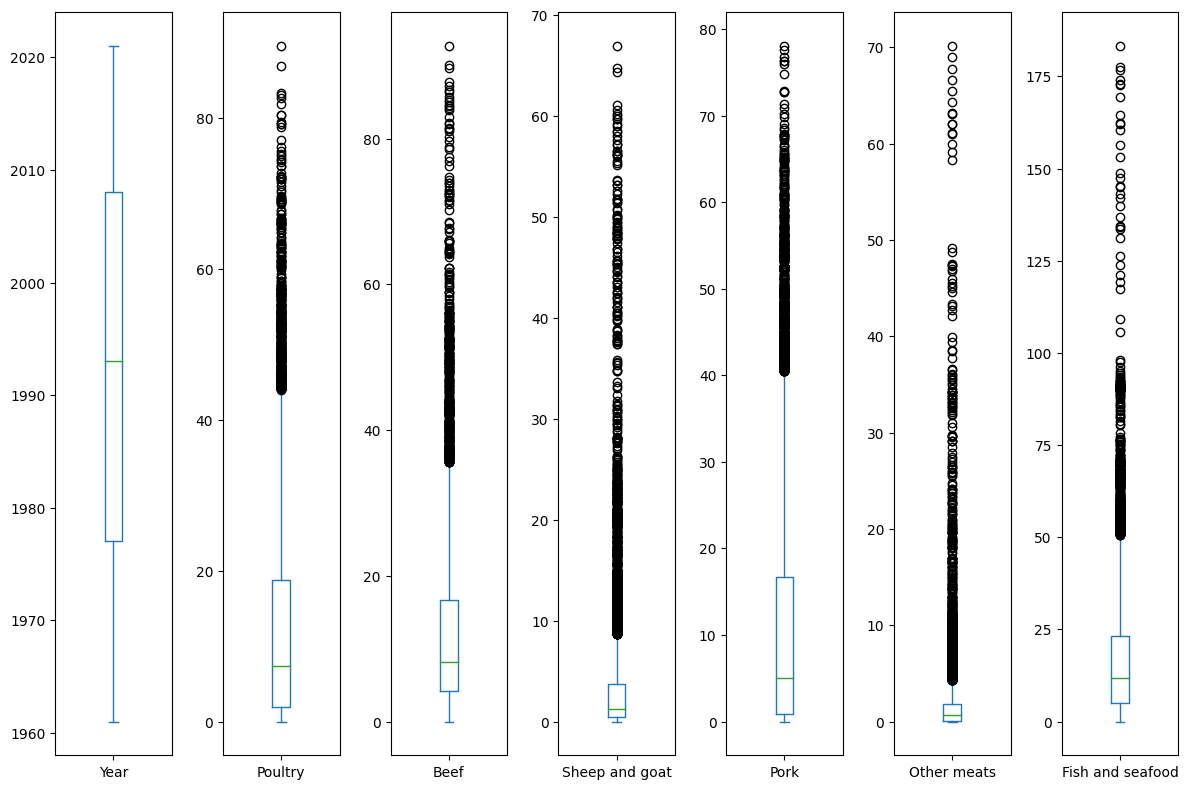

In [11]:
meat_data.plot(kind='box', 
               subplots=True, 
               figsize=(12, 8),
               )  # Horizontal boxes (optional)
plt.tight_layout()  # Prevents overlapping
plt.show()

**It may seem that outliers is somehow acceptable here due to various reasons, In beef, it could be due to large inequalities between nations. Pork consumption due to Islamic countries hardly consuming any. Seafood consumption due to countries like Iceland and other island nations relying heavily on fish.**

# Cleaning GDP data

In [12]:
print(gdp_data.describe())
# Checking for duplicates
print(sum(gdp_data.duplicated()))


              Year  GDP per capita, PPP (constant 2017 international $)
count  6468.000000                                        6067.000000  
mean   2006.203927                                       18468.716787  
std       9.462483                                       20673.314399  
min    1990.000000                                         430.413540  
25%    1998.000000                                        3721.420050  
50%    2006.000000                                       10569.051000  
75%    2014.000000                                       26937.596000  
max    2022.000000                                      157600.640000  
0


In [13]:
print(gdp_data.isnull().sum())


Entity                                                   0
Сontinent                                                0
Year                                                     0
GDP per capita, PPP (constant 2017 international $)    401
dtype: int64


In [14]:
gdp_data = gdp_data.rename(columns={'GDP per capita, PPP (constant 2017 international $)': 'GDP'})

print(gdp_data['Entity'][gdp_data['GDP'].isnull()])

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
6397          Yemen
6398          Yemen
6399          Yemen
6400     Yugoslavia
6401     Yugoslavia
Name: Entity, Length: 401, dtype: object


In [15]:
gdp_data.dropna(subset=['GDP'], inplace=True)


In [16]:
print(gdp_data.isnull().sum())
print(gdp_data.describe())


Entity       0
Сontinent    0
Year         0
GDP          0
dtype: int64
              Year            GDP
count  6067.000000    6067.000000
mean   2006.469425   18468.716787
std       9.406218   20673.314399
min    1990.000000     430.413540
25%    1998.000000    3721.420050
50%    2007.000000   10569.051000
75%    2015.000000   26937.596000
max    2022.000000  157600.640000


# Visualizing Data

**Top 10 Red &  White meats**

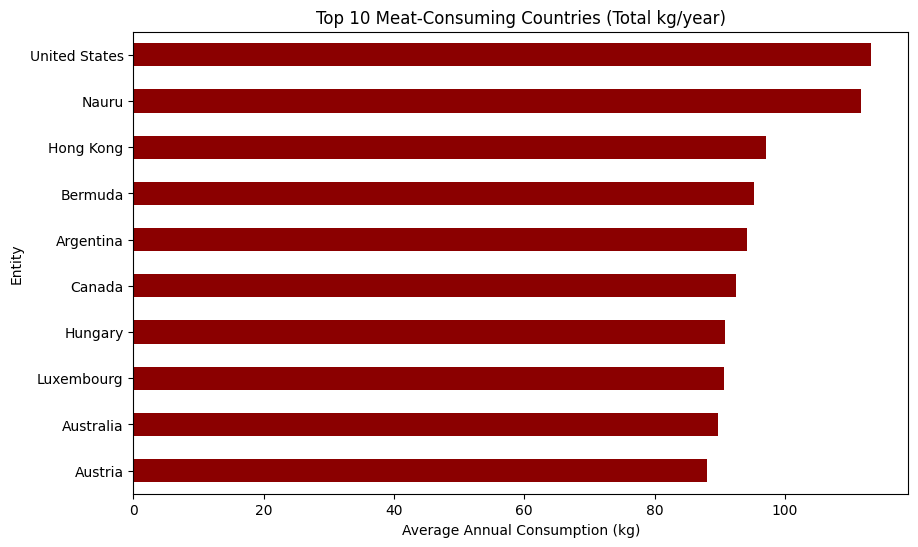

In [17]:
top_consumers = (meat_data.groupby('Entity')[['Poultry', 'Beef', 'Pork']]
                .mean()
                .sum(axis=1)
                .sort_values(ascending=False)  # Sort descending
                .head(10))  # Take top 10

plt.figure(figsize=(10, 6))
top_consumers.plot(kind='barh', color='darkred')
plt.title('Top 10 Meat-Consuming Countries (Total kg/year)')
plt.xlabel('Average Annual Consumption (kg)')
plt.gca().invert_yaxis()  # Flips the y-axis to show highest at top
plt.show()

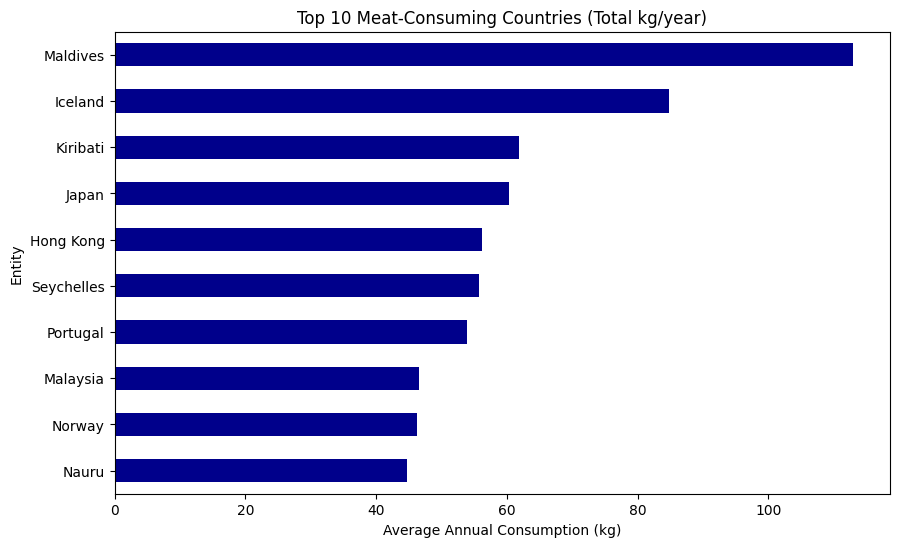

In [18]:
top_consumers = (meat_data.groupby('Entity')[['Fish and seafood']]
                .mean()
                .sum(axis=1)
                .sort_values(ascending=False)  # Sort descending
                .head(10))  # Take top 10

plt.figure(figsize=(10, 6))
top_consumers.plot(kind='barh', color='darkblue')
plt.title('Top 10 Meat-Consuming Countries (Total kg/year)')
plt.xlabel('Average Annual Consumption (kg)')
plt.gca().invert_yaxis()  # Flips the y-axis to show highest at top
plt.show()

**As assumed before, Islandic nations and countries with long coastlines like Iceland, Japan and Norway ranks in the top 10 for Seafood consumption.**

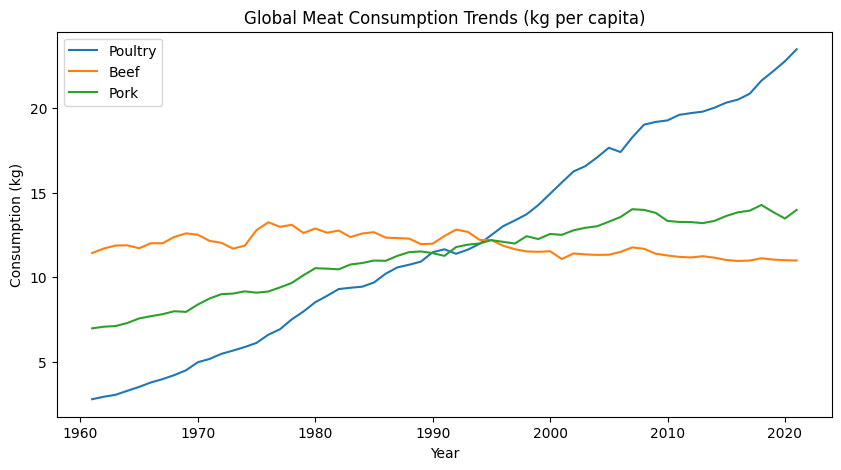

In [19]:
global_trends = meat_data.groupby('Year')[['Poultry', 'Beef', 'Pork']].mean()
global_trends.plot(figsize=(10, 5), title='Global Meat Consumption Trends (kg per capita)')
plt.ylabel('Consumption (kg)')
plt.show()

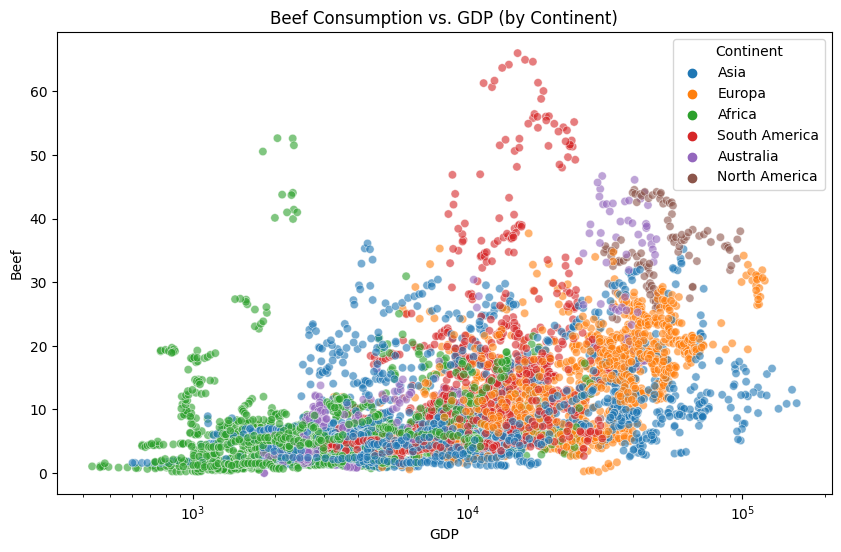

In [20]:
merged = pd.merge(meat_data, gdp_data, on=['Entity', 'Year'], how='inner')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged, x='GDP', y='Beef', hue='Сontinent', alpha=0.6)
plt.xscale('log')  # Log scale for better visualization
plt.title('Beef Consumption vs. GDP (by Continent)')
plt.show()

In [21]:


# Interactive scatter plot
fig = px.scatter(
    merged,
    x='GDP',
    y='Fish and seafood',
    color='Сontinent',
    hover_name='Entity',  # Shows country name on hover
    hover_data=['Year'],  # Additional hover info
    title='Seafood Consumption vs. GDP (by Continent)',
    labels={'GDP': 'GDP (log scale)', 'Fish and seafood': 'Seafood Consumption (kg)'},
    log_x=True,  # Logarithmic x-axis
    opacity=0.7,
    width=1000,
    height=600,
    template='plotly_white'  # Clean background
)

# Customize markers
fig.update_traces(
    marker=dict(size=6, line=dict(width=1, color='DarkSlateGrey')),
    selector=dict(mode='markers')
)

# Add annotations and adjust layout
fig.update_layout(
    xaxis_title='GDP (log scale)',
    yaxis_title='Seafood Consumption (kg per capita)',
    legend_title_text='Continent',
    hovermode='closest'  # Better hover behavior
)

fig.show()

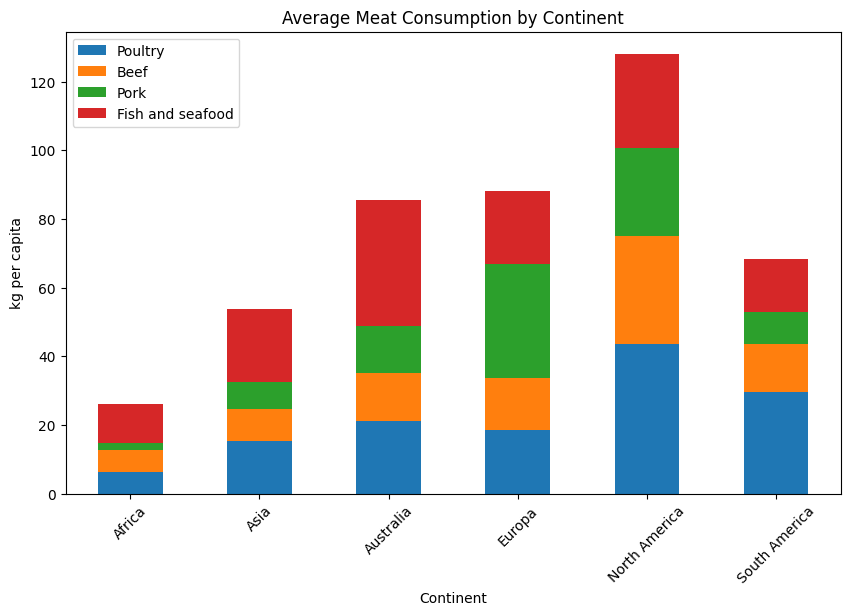

In [22]:
continent_meat = merged.groupby('Сontinent')[['Poultry', 'Beef', 'Pork','Fish and seafood']].mean()
continent_meat.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Average Meat Consumption by Continent')
plt.ylabel('kg per capita')
plt.xticks(rotation=45)
plt.show()

**This analysis reveals a clear relationship between economic growth and meat consumption patterns, with wealthier nations showing higher beef consumption while poultry dominates globally. Continental differences highlight cultural preferences, and outlier countries suggest non-economic factors at play, such as availability of rangeland or populations concentrations on coastal lines.**